In [1]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
path = 'data/shakespeare/shakespeare.txt'
org_data = open(path).read().lower()
org_data = org_data.replace(u'\xa0',u' ')
org_data = org_data.replace('\u200a',' ')
org_data = org_data.replace('\n',' ')
org_data = org_data.split(",")
text_data=org_data[300:int((len(org_data)/20))]
print('txt length:', len(text_data))

txt length: 2468


In [3]:
tokenizer = Tokenizer(num_words=3,lower=True,
                      char_level=False,oov_token='<>') # For those words which are not found in word_index
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1
print("Total number of words: ", total_words)

Total number of words:  4175


In [4]:
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  22460


In [5]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [6]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=30, verbose=1,callbacks=[callback])

Epoch 1/50


C:\Users\sheng\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


702/702 [==============================] - 179s 252ms/step - loss: 0.1233 - accuracy: 0.9847
Epoch 2/50
702/702 [==============================] - 138s 197ms/step - loss: 0.0916 - accuracy: 0.9861
Epoch 3/50
702/702 [==============================] - 127s 181ms/step - loss: 0.0894 - accuracy: 0.9861
Epoch 4/50
702/702 [==============================] - 129s 184ms/step - loss: 0.0790 - accuracy: 0.9861
Epoch 5/50
702/702 [==============================] - 124s 177ms/step - loss: 0.0779 - accuracy: 0.9861
Epoch 6/50
702/702 [==============================] - 136s 194ms/step - loss: 0.0752 - accuracy: 0.9861
Epoch 7/50
702/702 [==============================] - 147s 209ms/step - loss: 0.0765 - accuracy: 0.9861
Epoch 8/50
702/702 [==============================] - 141s 200ms/step - loss: 0.0760 - accuracy: 0.9861
Epoch 9/50
702/702 [==============================] - 142s 203ms/step - loss: 0.0756 - accuracy: 0.9861
Epoch 10/50
702/702 [==============================] - 146s 208ms/step - lo

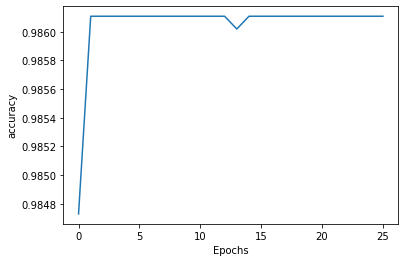

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

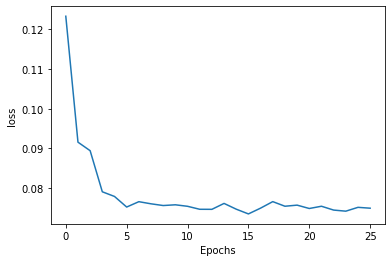

In [8]:
plot_graphs(history, 'loss')